# Classifiying Car Prices
## Chris Meehan
## 11/15/2020
## COMP740 Machine Learning - Fall 2020

```project_data.ipynb``` - Data Cleanup and Visualization

Original Data Source: https://www.kaggle.com/austinreese/craigslist-carstrucks-data


In [173]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk

%matplotlib inline

In [174]:
df = pd.read_csv('Data/vehicles.csv')

In [175]:
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423852,7184919761,https://duluth.craigslist.org/cto/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,1600,2006.0,hyundai,sonata,fair,6 cylinders,...,fwd,NaN,sedan,blue,https://images.craigslist.org/00E0E_8o5RKLUz3o...,Motor runs and drives good. Transmission shift...,NaN,mn,46.8348,-92.0742
423853,7184844576,https://duluth.craigslist.org/cto/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,9000,2003.0,toyota,sequoia limited,excellent,8 cylinders,...,4wd,full-size,SUV,green,https://images.craigslist.org/00G0G_BT0Ha3X736...,"2 owner 0 rust not from here... Leather ,roof ...",NaN,mn,46.9369,-91.9325
423854,7184805809,https://duluth.craigslist.org/cto/d/duluth-94-...,duluth / superior,https://duluth.craigslist.org,700,1994.0,ford,f-150,fair,6 cylinders,...,rwd,NaN,NaN,green,https://images.craigslist.org/00L0L_2MgECwYWhp...,I'm selling this beautiful old pickup that I j...,NaN,mn,46.7715,-92.1279
423855,7184791927,https://duluth.craigslist.org/ctd/d/duluth-199...,duluth / superior,https://duluth.craigslist.org,3800,1999.0,lincoln,town car,excellent,8 cylinders,...,rwd,NaN,sedan,NaN,https://images.craigslist.org/00q0q_6msyGUIqK3...,1999 *** Lincoln Town Car 4dr Sdn Signature Se...,NaN,mn,46.8433,-92.2550


## Data Cleanup

In [176]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

Going to drop many of these columns as they will be of no use in helping us predict price

In [177]:
df = df.drop(columns=['id', 'url', 'region', 'region_url', 'county', 'image_url', 'county','state','lat','long','vin','size','type','description'])

As there is a very large amount of data in this dataset, dropping all the na values should leave me with plenty of data intact.

In [178]:
df = df.dropna()
df.shape

(91489, 12)

As it may be difficult for this to predict on vehicles with only one occurance, i am going to drop any models that occur in the data less than 100 times.

In [179]:
counts = df['model'].value_counts()
to_remove = counts[counts <= 100].index
df = df[~df.model.isin(to_remove)]

In [180]:
df['model'].value_counts()

f-150             1396
silverado 1500    1307
1500               719
escape             680
camry              677
                  ... 
navigator          105
accord ex-l        105
beetle             104
edge sel           103
cooper             101
Name: model, Length: 162, dtype: int64

In [181]:
df.shape

(40773, 12)

Now i plan to work with each feature and clean them up individually.  

In [183]:
df['cylinders'].value_counts()

4 cylinders     15733
6 cylinders     13668
8 cylinders     10828
5 cylinders       268
10 cylinders      189
3 cylinders        47
other              39
12 cylinders        1
Name: cylinders, dtype: int64

In [184]:
df.drop(df[df['cylinders'] == 'other'].index, inplace = True) 

In [185]:
df['cylinders'].value_counts()

4 cylinders     15733
6 cylinders     13668
8 cylinders     10828
5 cylinders       268
10 cylinders      189
3 cylinders        47
12 cylinders        1
Name: cylinders, dtype: int64

In [186]:
df['cylinders'] = df['cylinders'].str.strip('cylinders')

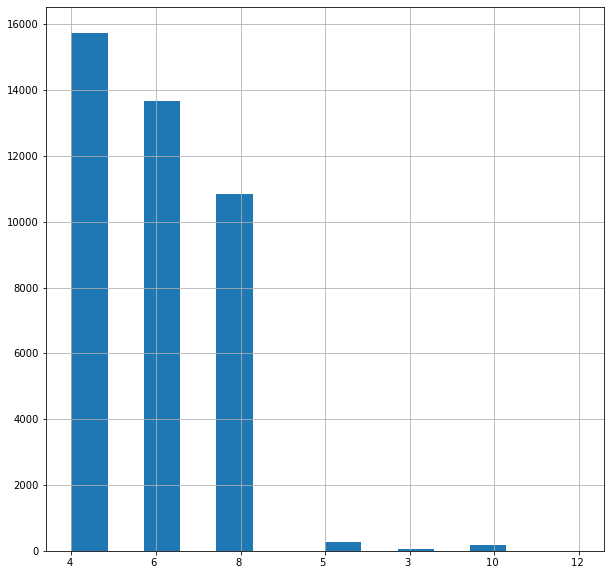

In [187]:
df['cylinders'].hist(bins=14, figsize=(10,10))

In [188]:
df['title_status'].value_counts()

clean         38487
rebuilt        1235
salvage         486
lien            474
missing          36
parts only       16
Name: title_status, dtype: int64

As these may be outliers in data i will remove cars with salvage, parts only and missing titles.  

In [189]:
df = df.drop(df.loc[df['title_status'] == 'salvage'].index)
df = df.drop(df.loc[df['title_status'] == 'parts only'].index)
df = df.drop(df.loc[df['title_status'] == 'missing'].index)

In [190]:
df['title_status'].value_counts()

clean      38487
rebuilt     1235
lien         474
Name: title_status, dtype: int64

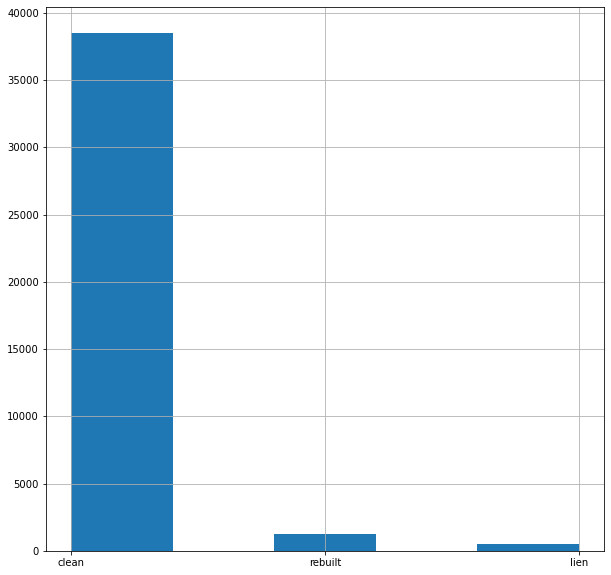

In [191]:
df['title_status'].hist(bins=5, figsize=(10,10))

In [192]:
df['transmission'].value_counts()

automatic    37063
manual        2609
other          524
Name: transmission, dtype: int64

In [193]:
df.drop(df[df['transmission'] == 'other'].index, inplace = True) 

In [194]:
df['transmission'].value_counts()

automatic    37063
manual        2609
Name: transmission, dtype: int64

In [195]:
df['drive'].value_counts()

fwd    16605
4wd    16213
rwd     6854
Name: drive, dtype: int64

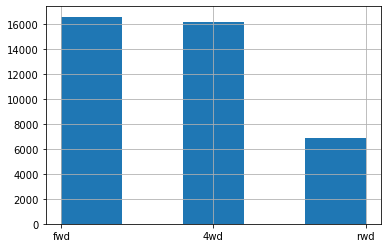

In [196]:
df['drive'].hist(bins=5)

In [197]:
df['paint_color'].value_counts()

white     9481
black     7088
silver    6146
grey      4860
blue      4239
red       4010
green     1276
brown     1025
custom    1010
yellow     245
orange     175
purple     117
Name: paint_color, dtype: int64

In [198]:
df.drop(df[df['paint_color'] == 'custom'].index, inplace = True) 

In [199]:
colors = df['paint_color'].value_counts()
colors

white     9481
black     7088
silver    6146
grey      4860
blue      4239
red       4010
green     1276
brown     1025
yellow     245
orange     175
purple     117
Name: paint_color, dtype: int64

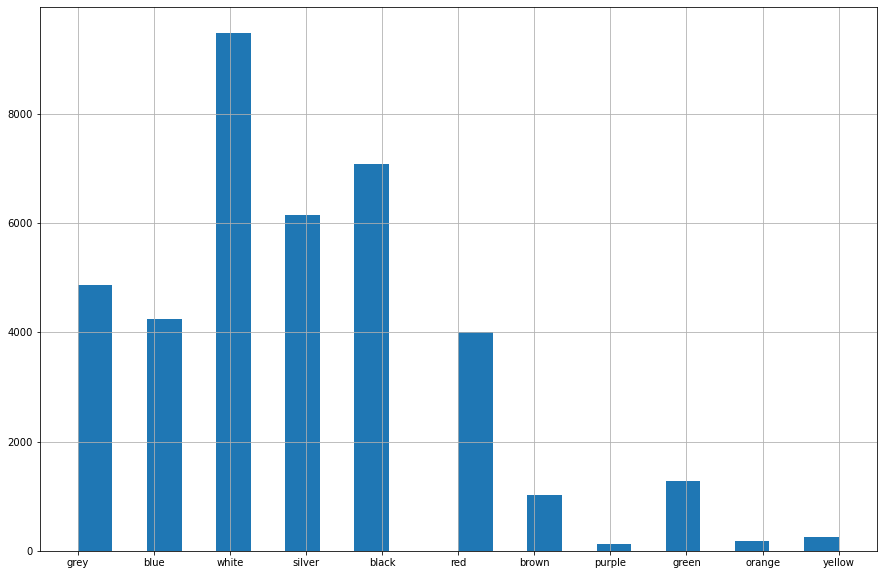

In [200]:
df['paint_color'].hist(bins=22,figsize=(15,10))

In [201]:
df['fuel'].value_counts()

gas         36087
diesel       2012
hybrid        410
other         152
electric        1
Name: fuel, dtype: int64

In [202]:
df.drop(df[df['fuel'] == 'other'].index, inplace = True) 
df.drop(df[df['fuel'] == 'electric'].index, inplace = True) 

In [203]:
df['fuel'].value_counts()

gas       36087
diesel     2012
hybrid      410
Name: fuel, dtype: int64

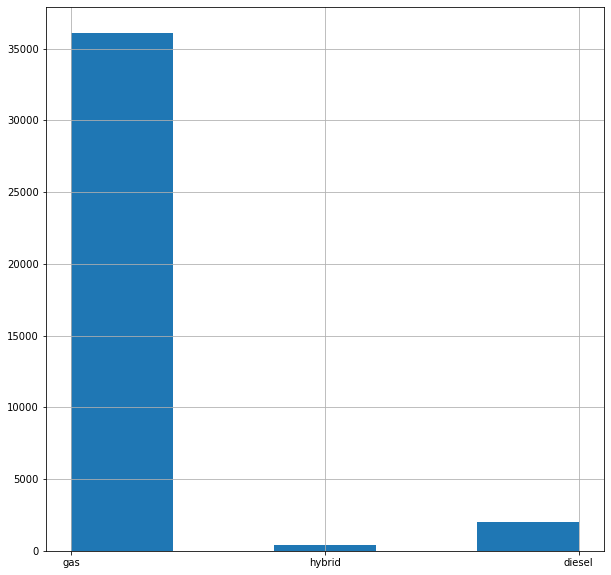

In [204]:
df['fuel'].hist(bins=5,figsize=(10,10))

In [205]:
df['condition'].value_counts()

excellent    19455
good         14000
like new      3434
fair          1406
new            160
salvage         54
Name: condition, dtype: int64

In [206]:
df.drop(df[df['condition'] == 'salvage'].index, inplace = True)

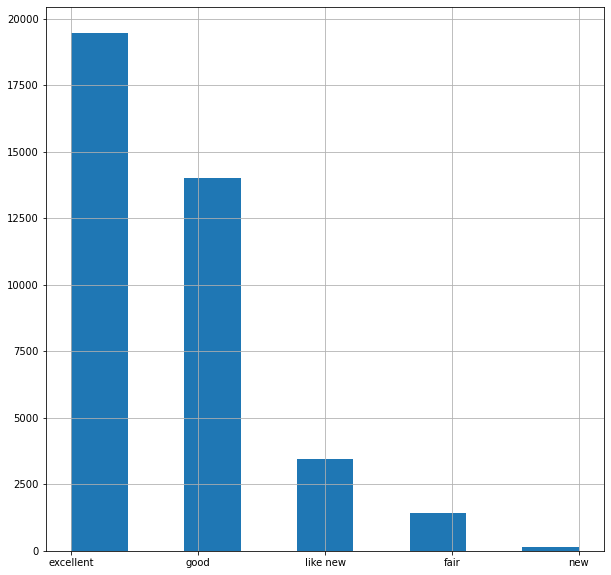

In [207]:
df['condition'].hist(bins=9,figsize=(10,10))

In [208]:
df['manufacturer'].value_counts()

ford             8271
chevrolet        7128
toyota           3757
honda            3139
nissan           2258
jeep             2200
gmc              1474
dodge            1348
ram              1331
hyundai          1183
subaru           1130
volkswagen        856
chrysler          813
kia               656
bmw               607
cadillac          432
buick             291
mazda             289
acura             284
pontiac           222
lexus             213
mercedes-benz     145
audi              127
saturn            108
lincoln           101
mini               91
rover               1
Name: manufacturer, dtype: int64

In [209]:
df = df.drop(df.loc[df['manufacturer'] == 'rover'].index)

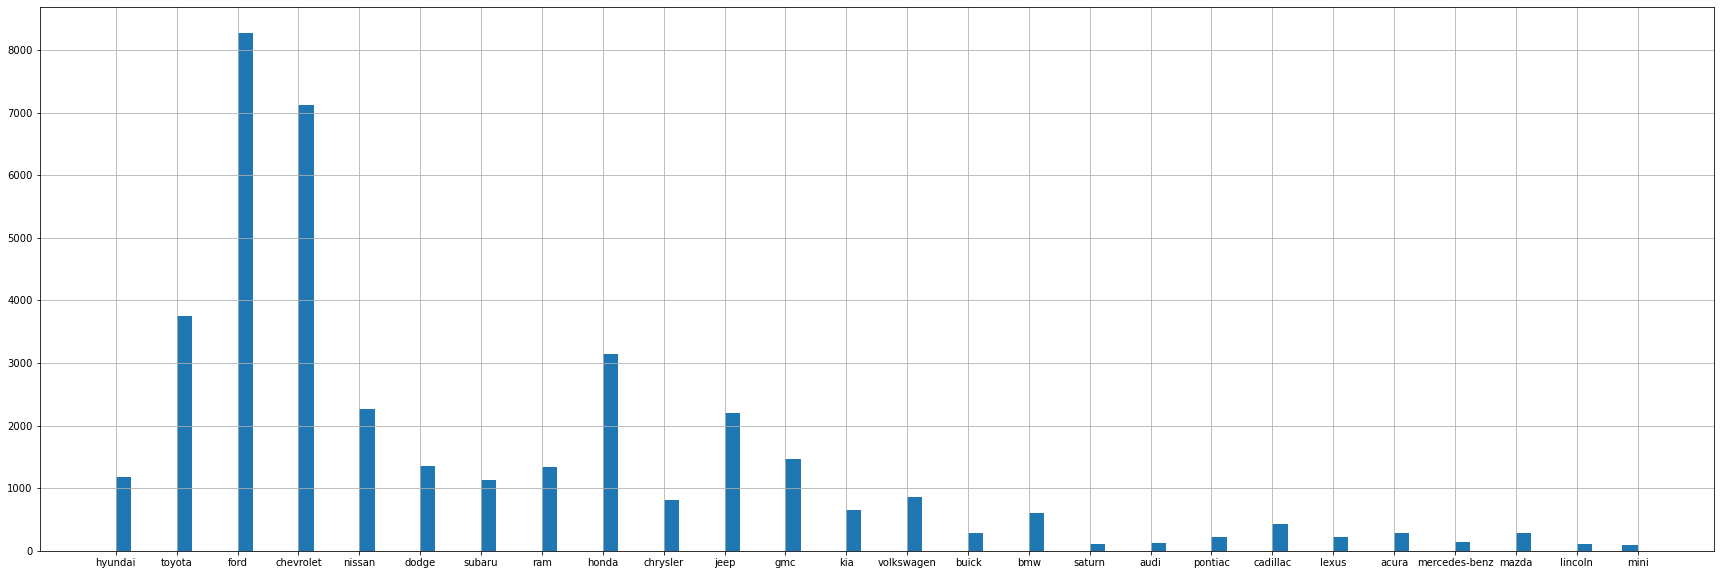

In [210]:
df['manufacturer'].hist(bins=100,figsize=(30,10))

In [211]:
df['year'].value_counts()

2013.0    2898
2011.0    2880
2012.0    2750
2008.0    2482
2015.0    2447
          ... 
1959.0       2
1953.0       2
1958.0       1
1955.0       1
1952.0       1
Name: year, Length: 66, dtype: int64

In [212]:
df['year'] = df['year'].astype(int)

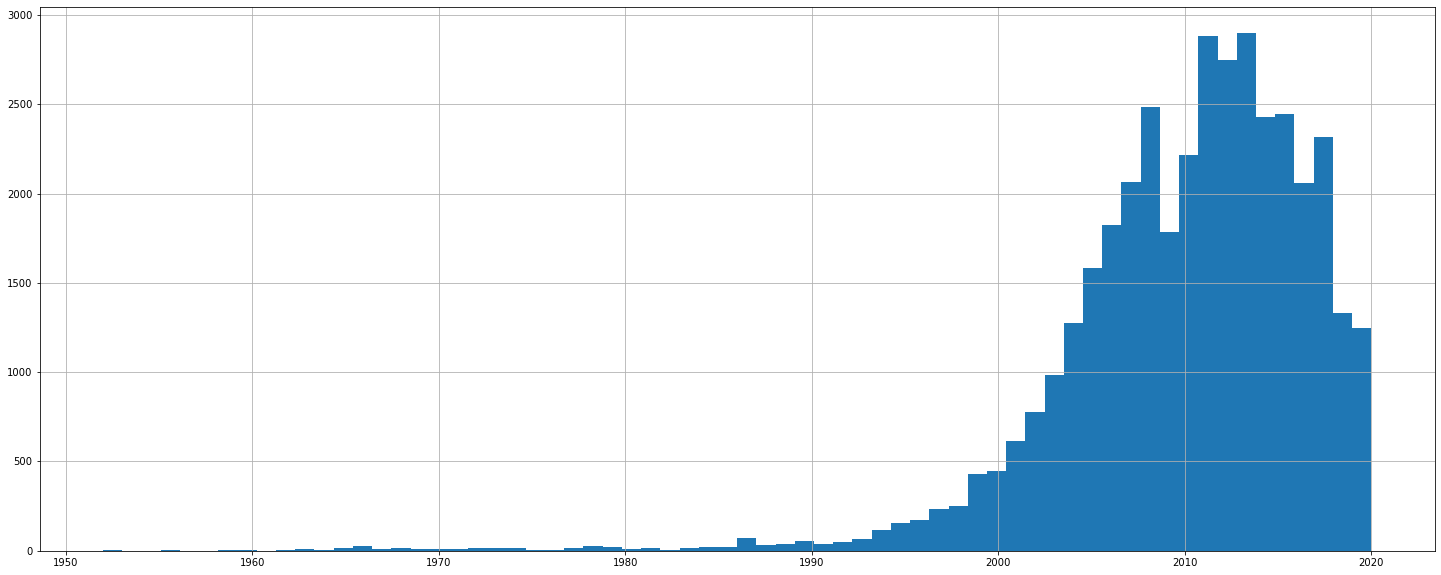

In [213]:
df['year'].hist(bins=66,figsize=(25,10))

For price, i cannot allow any 0 values, as that would throw off alot of predictions any model were to make, next ideally i keep all of the prices within a specific set, $50,000 for example, anything more than this would be an exotic car and likely need a different model to calculate it's value. 

In [214]:
df['price'].value_counts()

0        1914
6995      474
8995      474
3500      455
7995      445
         ... 
4712        1
43375       1
4240        1
34947       1
12984       1
Name: price, Length: 2795, dtype: int64

In [215]:
df.drop(df[df['price'] == 0].index, inplace = True) 

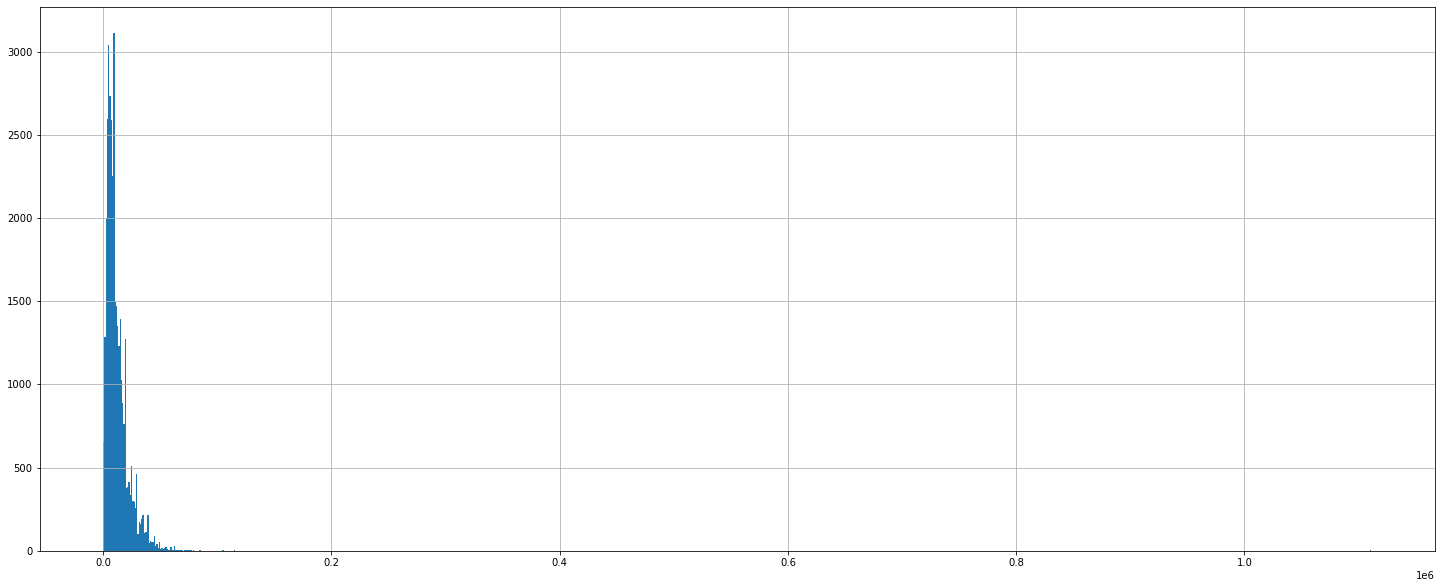

In [216]:
df['price'].hist(bins=1000,figsize=(25,10))

In [217]:
df = df.loc[df['price'] < 50000]

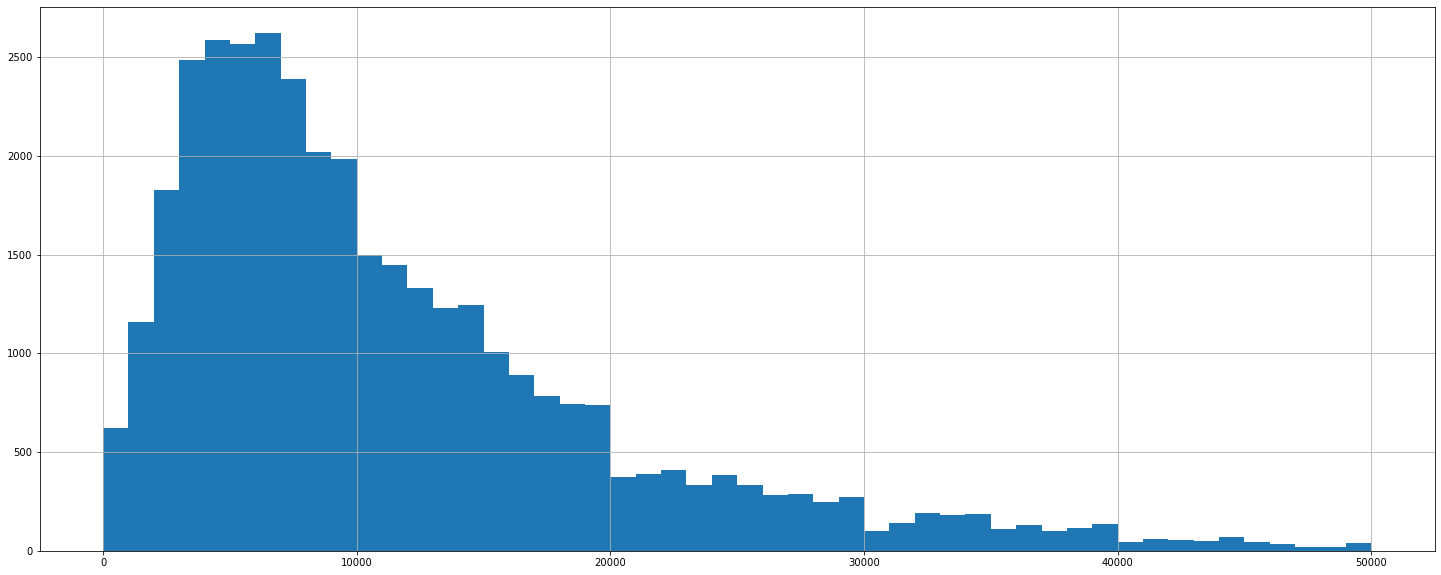

In [220]:
df['price'].hist(bins=50,figsize=(25,10))

In [232]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,paint_color
1,8750,2013,hyundai,sonata,excellent,4,gas,90821.0,clean,automatic,fwd,grey
2,10900,2013,toyota,prius,good,4,hybrid,92800.0,clean,automatic,fwd,blue
5,13995,2012,ford,f-150,good,6,gas,188406.0,clean,automatic,4wd,grey
6,7995,2010,chevrolet,equinox,good,4,gas,108124.0,clean,automatic,4wd,grey
7,8995,2011,chevrolet,traverse,good,6,gas,178054.0,clean,automatic,4wd,white
...,...,...,...,...,...,...,...,...,...,...,...,...
423823,9584,2012,toyota,camry,excellent,4,gas,145000.0,clean,automatic,fwd,grey
423824,1000,2004,ford,f-150,fair,8,gas,177000.0,clean,automatic,4wd,blue
423825,11750,2013,honda,civic ex,excellent,4,gas,57600.0,clean,automatic,fwd,silver
423852,1600,2006,hyundai,sonata,fair,6,gas,159980.0,clean,automatic,fwd,blue


Exporting modified DataFrame to a pickle file for upload as well as use in my notebook for classification. 

In [219]:
file = open('Data/vehicles_new', 'wb')
pk.dump(df, file)
file.close()